***
***
***


## Apprentice Chef: Regression
A machine learning analysis

Analysis: [Marco Andre Remy Silva, MBA](https://www.linkedin.com/in/andremy)<br/>
Data set: Prof. Chase Kusterer
***
***
***

# Context
The company, Apprentice Chef, offers its busy customers the possibility to receive at their door a selection of daily-prepared meals together with a selection of disposable cookware for easy cleanup. Each meal takes 30 minutes to finish cooking at home, and the orders can be done through a user-friendly on-line platform and mobile app.

The following script focuses on analyzing a data set in order to build a machine learning regression model to predict the revenue of a client. This file contains the thought process that allowed me to reach to the final model that you can find in a python script in this same repository.

***
# Table of Content
1. [Initiation](#Initiation)
1. [Loading the Data](#Loading-the-Data)
1. [Exploration Data Analysis](#Exploration-Data-Analysis)
1. [Feature Engineering](#Feature-Engineering)
1. [Feature and Model Selection](#feature-and-model-selection)
1. [Model Building](#model-building)
1. [Conclusions](#conclusions)

***
# Initiation
## Importing libraries

First of all, I will import all the necessary libraries for the analysis. Even though I can import the libraries at any point in the code before using them, I rather do all the imports at the beginning to organize myself.

Here we can find libraries such as:
- [pandas](https://pandas.pydata.org/docs/): Library for data manipulation and data analysis.
- [numPy](https://numpy.org/doc/stable/contents.html): Library for mathematical and logical manipulation of multi-dimentional arrays and matrices.
- [sciPy](https://docs.scipy.org/doc/scipy-1.5.2/reference/tutorial/general.html): Support scientific computing for optimization, linear algebra, and more.
- [matplotlib](https://matplotlib.org/3.3.1/users/index.html): 2-D and 3-D plotting. Works with NumPy.
- [seaborn](https://seaborn.pydata.org/): Extended data visualization tool based on matplotlib.
- [copy](https://docs.python.org/3/library/copy.html): Allows to create shallow and deep copies of Python objects.
- [warnings](https://docs.python.org/3/library/warnings.html): Will be used to mute the warning in some executions
- [scikit-learn](https://scikit-learn.org/stable/modules/classes.html): Machine learning library.

- [regression_utils](utils/regression_utils.py): Custom library that handles the construction of regression models

In [25]:
# Basic Libraries
import pandas            as pd
import numpy             as np
import scipy             as sp
import matplotlib.pyplot as plt
import seaborn           as sns
import copy
import warnings

# Scikit-Learn Libraries
import sklearn
import sklearn.neural_network
import sklearn.base as skbase
import sklearn.linear_model as lm
import sklearn.feature_selection as fs

from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning
from sklearn.neighbors       import KNeighborsClassifier   # KN-Neighbors

# Custom Regression Utility Library
from utils.regression_utils  import Utils

## Initializing global variables
Some global variables that will be used along the analysis.
- TEST_SIZE: Will be used to determine the size of the test data set when splitting the data.
- SEED: Will be used when splitting the data on training and test set to make the result reproducible and not depending on the variability of the randomization.

In [26]:
TEST_SIZE = 0.25
SEED      = 222

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

***
# Loading the Data
Now, I load the dataset stored in the file *data/Apprentice_Chef_Dataset.xlsx* to a variable called **original_df**

In [27]:
original_df = pd.read_excel("data/Apprentice_Chef_Dataset.xlsx")
original_df.head(10)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253
5,1250.0,1,Aegor Rivers,aegor.rivers@gmail.com,Aegor,Rivers,57,4,6,2,84.21,1,0,0,1,5,1,10,2,5,0,0,70,91.2,3,1,2,17,0
6,4665.0,1,Aelinor Penrose,aelinor.penrose@homedepot.com,Aelinor,Penrose,106,3,10,8,110.00,1,3,0,0,6,2,7,0,3,0,0,70,263.3,6,2,4,10,705
7,1690.0,1,Aemma Arryn,aemma.arryn@yahoo.com,Aemma,Arryn,122,6,8,10,92.73,1,1,0,1,5,1,8,0,3,0,0,70,160.0,5,1,3,13,0
8,1710.0,1,Aemon Rivers,aemon.rivers@caterpillar.com,Aemon,Rivers,46,4,5,10,170.47,1,0,0,1,6,2,8,4,10,1,1,70,170.1,4,2,3,12,0
9,1770.0,1,Aggar,aggar@protonmail.com,Aggar,Aggar,58,4,6,5,79.58,1,0,1,1,6,2,2,3,7,1,1,90,191.3,7,1,3,12,0


Each observation in the data set represents a single user, and each column contains the cumulative information from 12 consecutive months. Given that for this analysis I will be predicting the revenue, I will separate the variables as follows.

**Dependent Variable**
- REVENUE: The cumulative revenue that the user has brought in the past 12 months.

**Independent Variables**

<!--
- CROSS_SELL_SUCCESS: 1 if the customer has accepted the cross-selling promotion. 0 if the customer hasn't.
- NAME: Full name of the customer.
- EMAIL: Email of the customer.
- FIRST_NAME: First name of the customer.
- FAMILY_NAME: Last name of the customer.
- TOTAL_MEALS_ORDERED: Cumulative number of meals ordered by the client.
- UNIQUE_MEALS_PURCH: Number of unique meals. This number increase with every new meal ordered (a meal that hasn't been ordered before by that user).
- CONTACTS_W_CUSTOMER_SERVICE: How many times the user has contacted customer service. This can be either to complain, to make a special request, or to ask for information.
- PRODUCT_CATEGORIES_VIEWED: The number of product categories viewed by the client.
- AVG_TIME_PER_SITE_VISIT: The average user's session time (or mobile app) that could've either finished in a purchased or not.
- MOBILE_NUMBER: 1 if the customer has registered his/her mobile number, 0 if he/she hasn't.
- CANCELLATIONS_BEFORE_NOON: Number of cancellations done before noon (which are free cancelations).
- CANCELLATIONS_AFTER_NOON: Number of cancellations done after noon (50% refund).
- TASTES_AND_PREFERENCES: 1 if the customer has registered his/her tastes and preferences, 0 if he/she hasn't.
- MOBILE_LOGINS: Number of logins made on the mobile app.
- PC_LOGINS: Number of logins made on the web platform.
- WEEKLY_PLAN: Number of times customer ordered the weekly plan
- EARLY_DELIVERIES: Number of times the customer has received his/her meal before the delivery window.
- LATE_DELIVERIES: Number of times the customer has received his/her meal after the delivery window.
- PACKAGE_LOCKER: 1 if the customers' building has a package locker, 0 if he/she doesn't.
- REFRIGERATED_LOCKER: 1 if the customers' building has a refrigerated locker, 0 if he/she doesn't.
- FOLLOWED_RECOMMENDATIONS_PCT: The percentage of time the customer has followed the meal recommendation generated by the company's algorithm for them.
- AVG_PREP_VID_TIME: Average time in seconds the meal prep video was played.
- LARGEST_ORDER_SIZE: Largest number of meals ordered in a single order.
- MASTER_CLASSES_ATTENDED: Number of master classes attended by the customer.
- MEDIAN_MEAL_RATING: Median rating that the customer has given to his/her meals.
- AVG_CLICKS_PER_VISIT: Average number of clicks done by the customer per visit.
- TOTAL_PHOTOS_VIEWED: Total number of clicks on photos done by the customer.
-->

- Binary Variables:
    - CROSS_SELL_SUCCESS: 1 if the customer has accepted the cross-selling promotion. 0 if the customer hasn't.
    - MOBILE_NUMBER: 1 if the customer has registered his/her mobile number, 0 if he/she hasn't.
    - TASTES_AND_PREFERENCES: 1 if the customer has registered his/her tastes and preferences, 0 if he/she hasn't.
    - PACKAGE_LOCKER: 1 if the customers' building has a package locker, 0 if he/she doesn't.
    - REFRIGERATED_LOCKER: 1 if the customers' building has a refrigerated locker, 0 if he/she doesn't.


- Discrete Variables:
    - TOTAL_MEALS_ORDERED: Cumulative number of meals ordered by the client.
    - UNIQUE_MEALS_PURCH: Number of unique meals. This number increase with every new meal ordered (a meal that hasn't been ordered before by that user).
    - CONTACTS_W_CUSTOMER_SERVICE: How many times the user has contacted customer service. This can be either to complain, to make a special request, or to ask for information.
    - WEEKLY_PLAN: Number of times customer ordered the weekly plan.
    - TOTAL_PHOTOS_VIEWED: Total number of clicks on photos done by the customer.


- Categorical Variables:
    - PRODUCT_CATEGORIES_VIEWED: The number of product categories viewed by the client.
    - CANCELLATIONS_BEFORE_NOON: Number of cancellations done before noon (which are free cancelations).
    - CANCELLATIONS_AFTER_NOON: Number of cancellations done after noon (50% refund).
    - MOBILE_LOGINS: Number of logins made on the mobile app.
    - PC_LOGINS: Number of logins made on the web platform.
    - EARLY_DELIVERIES: Number of times the customer has received his/her meal before the delivery window.
    - LATE_DELIVERIES: Number of times the customer has received his/her meal after the delivery window.
    - FOLLOWED_RECOMMENDATIONS_PCT: The percentage of time the customer has followed the meal recommendation generated by the company's algorithm for them.
    - LARGEST_ORDER_SIZE: Largest number of meals ordered in a single order.
    - MASTER_CLASSES_ATTENDED: Number of master classes attended by the customer.
    - MEDIAN_MEAL_RATING: Median rating that the customer has given to his/her meals.
    - AVG_CLICKS_PER_VISIT: Average number of clicks done by the customer per visit.


- Continuous Variables:
    - AVG_TIME_PER_SITE_VISIT: The average user's session time (or mobile app) that could've either finished in a purchased or not.
    - AVG_PREP_VID_TIME: Average time in seconds the meal prep video was played.


- Other Variables:
    - NAME: Full name of the customer.
    - EMAIL: Email of the customer.
    - FIRST_NAME: First name of the customer.
    - FAMILY_NAME: Last name of the customer.

**Note**: This list of independent variables is my starting point. From this point forward, I will start analyzings which of these variables actually help predict the dependent variable (REVENUE) 

Now, I am declaring a dictionary that will help me easily access a group of features (variables) according to its type.  

In [28]:
# Dependent variables
dependent_variable = "REVENUE"


# A dictionary that will quickly help identify what features are binary, 
# discrete, continuous, or other
original_features = {
    "binary": [
        "CROSS_SELL_SUCCESS",
        "MOBILE_NUMBER",
        "TASTES_AND_PREFERENCES",
        "PACKAGE_LOCKER",
        "REFRIGERATED_LOCKER"
    ],
    "discrete": [
        "TOTAL_MEALS_ORDERED",
        "UNIQUE_MEALS_PURCH",
        "CONTACTS_W_CUSTOMER_SERVICE",
        "WEEKLY_PLAN",
        "TOTAL_PHOTOS_VIEWED"
    ],
    "categorical": [
        "PRODUCT_CATEGORIES_VIEWED",
        "CANCELLATIONS_BEFORE_NOON",
        "CANCELLATIONS_AFTER_NOON",
        "MOBILE_LOGINS",
        "PC_LOGINS",
        "EARLY_DELIVERIES",
        "LATE_DELIVERIES",
        "FOLLOWED_RECOMMENDATIONS_PCT",
        "LARGEST_ORDER_SIZE",
        "MASTER_CLASSES_ATTENDED",
        "MEDIAN_MEAL_RATING",
        "AVG_CLICKS_PER_VISIT"
    ],
    "continuous": [
        "AVG_TIME_PER_SITE_VISIT",
        "AVG_PREP_VID_TIME"
    ],
    "other": [
        "NAME",
        "EMAIL",
        "FIRST_NAME",
        "FAMILY_NAME"
    ]
}

***
# Exploration Data Analysis
Now, I will explore the data to check for some insights that will help make assess the cleanness of the data, the usefulness of existing features, and brainstorm new features.

## Info
Checking the data type of each column

In [29]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REVENUE                       1946 non-null   float64
 1   CROSS_SELL_SUCCESS            1946 non-null   int64  
 2   NAME                          1946 non-null   object 
 3   EMAIL                         1946 non-null   object 
 4   FIRST_NAME                    1946 non-null   object 
 5   FAMILY_NAME                   1899 non-null   object 
 6   TOTAL_MEALS_ORDERED           1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH            1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE   1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED     1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT       1946 non-null   float64
 11  MOBILE_NUMBER                 1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON     1946 non-null   int64  
 13  CAN

## Null Values
Looking for null values in the data

In [30]:
original_df.isna().sum()

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
MOBILE_LOGINS                    0
PC_LOGINS                        0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

*Family Name* is the only attribute that has null values is the data set. I don't believe this is going to be a relevant information to predict revenue. So, I won't take any immediate action on the observations with empty last name.

## Describe
Analyzing the basic statistics of every numerical variable

In [31]:
original_df.describe()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,2107.292652,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,0.714286,5.515930,1.476362,11.329908,1.486125,2.970709,0.355087,0.113052,35.411100,150.556578,4.436793,0.604317,2.794964,13.508222,106.433710
std,1138.290709,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,0.451870,0.580757,0.527600,13.573303,2.318599,2.744598,0.478663,0.316738,26.577927,49.447180,1.550972,0.641866,0.756528,2.333876,181.014124
min,131.000000,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.400000,0.000000,0.000000,1.000000,5.000000,0.000000
25%,1350.000000,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,10.000000,114.400000,3.000000,0.000000,2.000000,12.000000,0.000000
50%,1740.000000,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,1.000000,6.000000,1.000000,7.000000,0.000000,2.000000,0.000000,0.000000,30.000000,145.600000,4.000000,1.000000,3.000000,13.000000,0.000000
75%,2670.000000,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,1.000000,6.000000,2.000000,13.000000,3.000000,4.000000,1.000000,0.000000,60.000000,173.775000,5.000000,1.000000,3.000000,15.000000,174.000000
max,8793.750000,1.000000,493.000000,19.000000,18.000000,10.000000,1645.600000,1.000000,13.000000,3.000000,1.000000,7.000000,3.000000,52.000000,9.000000,19.000000,1.000000,1.000000,90.000000,564.200000,11.000000,3.000000,5.000000,19.000000,1600.000000


The column *LARGEST_ORDER_SIZE* shows an inconsistency.

1. LARGEST_ORDER_SIZE: Because each record shows the information of an active customer, I was expecting to have values greater or equal to 1 in this column. Nonetheless, one record has a value of 0. Given that it is only 1 record, I will remove this observation from the data set**.

** If I were to loose more records, I would've found a way to fill this value. I could've used the mean, predicted with the help of any other feature with a strong correlation, or used any other method.

Before manipulating the data in the dataset, I will create a copy so I can always go back to the original data if necessary.

In [32]:
flagged_df = original_df.copy()

# Keeping only observations with a LARGEST_ORDER_SIZE greater than 0
flagged_df = flagged_df[flagged_df['LARGEST_ORDER_SIZE'] > 0]

To continue with the analysis of the data, I will use data visualization tools to clearly visualize trends and relationship between variables.

## Visualizing Data
To optimize the size of this file, I will be posting the detailed data visualization in the Notebook called [SupervisedLearning_VisualAnalysis.ipynb](./SupervisedLearning_VisualAnalysis.ipynb).

### Dependent Variable (Revenue)

Most of the tests that I will be doing are based on the assumption that the variable to predict follows a normal distribution. That is why the first step is to see if this assumptions is checked.

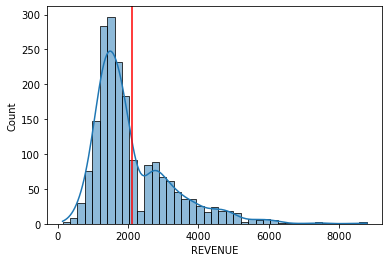

Skewness = 1.6253191915610712
Kurtosis = 3.3428756603681506


In [33]:
sns.histplot(
    x=original_df[dependent_variable],
    kde=True
)
plt.axvline(original_df[dependent_variable].describe()["mean"], 0, 1, color="red")
plt.show()
print(f"Skewness = {sp.stats.skew(original_df[dependent_variable])}")
print(f"Kurtosis = {sp.stats.kurtosis(original_df[dependent_variable])}")

The plot and the statistics shows that the data is skewed to the right. Let see what happened to the distribution of the data when the I apply the natural logarithm to the dependent variable.

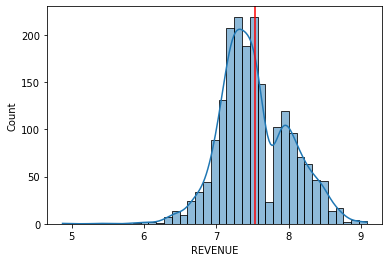

Skewness = 0.18394804811168472
Kurtosis = 0.5010607284326261


In [34]:
transformed_data = original_df[dependent_variable].apply(np.log)

sns.histplot(
    x=transformed_data,
    kde=True
)
plt.axvline(transformed_data.describe()["mean"], 0, 1, color="red")
plt.show()
print(f"Skewness = {sp.stats.skew(transformed_data)}")
print(f"Kurtosis = {sp.stats.kurtosis(transformed_data)}")

When the logarithmic transformation is applied to REVENUE, its distribution approximates a normal distribution as seen by the plot and by the values of Skewness and Kurtosis, which are closer to 0. Since this is going to be more useful for the analysis I will do, I will add a new field that will hold the transformed revenue.

In [35]:
transformed_dependent = "ln_REVENUE"
flagged_df[transformed_dependent] = flagged_df[dependent_variable].apply(np.log)

Now, I will proceed to perform the visual analysis on the independent variables (also called features)

### Independent Variables (Features)
To analyze the independent variables, you have to consider the nature of the variable it self and its relationship with the dependent variable. This means that an independent continuous variable shouldn't be analyzed the same way as a binary variable.

This being said, this analysis will be divided in two: (1) Continuous and Discrete variables and (2) Binary and Categorical variables.
- **Continuous and Discrete variables**

To perform the visual analysis, I will plot each variable as it is and its logarithmic transformation. The plots I will use for both are the histogram, box plot, scatter plot (with a linear regression estimate), and the KDE plot. The first two will help me to assess the distribution type and outliers, while the latter two will be plotted against the transformed dependent variable (natural logarithm of the Revenue) to look for any patter or trend.

To ease the plotting process, I created a function that draws the previously described plots by receiving name of the feature to assess, the dataset, performs its transformation, and the type of variable to evaluate. This function also applies the logarithmic transformation to the variable and adds it to the features dictionary.

In [36]:
def transform_continuous_discrete(data_df: pd.DataFrame, feature: str, variable_type: str) -> None:
    """
    Creates the necessary plots to visually assess the continuous and discrete variables.
    
    To assess distribution and outliers:
    - Distribution plot
    - Box plot
    
    To visualize correlation between the variable and the dependent variable:
    - Scatter plot (with a linear regression estimate)
    - KDE plot
    
    :param data_df: Pandas DataFrame containing the data to plot.
    :param feature: Name of the feature to plot.
    :param variable_type: Type of the variable to plot.
    
    :return: (Nothing to return).
    """
    global new_features
    global transformed_dependent
    
    new_feat = f'ln_{feature}'
    if new_feat not in new_features[variable_type]:
        new_features[variable_type] += [new_feat]
    data_df[new_feat] = data_df[feature]
    data_df.loc[data_df[feature]!=0, new_feat] = data_df[feature].apply(np.log)

- **Binary and Categorical variables**

The visual analysis for binary and categorical variables will require a different approach. For categorical variables, I will use a box plot, and for binary variables I will use a strip plot. In both cases, I will draw a violin plot overlapping them. I will also draw a point plot against the transformed dependent variable (natural logarithm of Revenue). The first charts (box plot for categorical and violin plot + strip plot for binary) will help me assess the distribution of the variables, while the latter one (the box plot vs the ln_REVENUE) will be used to look for any patterns or trends. I won't make any type of transformation to any of the independent variables.

Since I will start adding new features, I will create a deep copy of the features dictionary. Any new feature created will be added to this copy for future reference.

In [37]:
new_features = copy.deepcopy(original_features)

I will now proceed to plot and analyze each variable

#### Continuous Variables

In [38]:
variable_type = "continuous"
features = original_features[variable_type]

for feat in features:
    transform_continuous_discrete(flagged_df, feat, variable_type)

The two variables seem to be approaching to a normal distributions when transformed to natural logarithm. There is even a reduced margin of error in the estimated regression line. The skew and kurtosis statistics of both transformed features are closer to 0 compared to its regular form.

We can also observe some clear outliers in both independen variables:
- AVG_PREP_VID_TIME: When its greater than 350
- AVG_TIME_PER_SITE_VISIT: When its greater than 1000

I will flag this outliers in the [Feature Engineering](#outliers-&-trends) section.

Since I will be using the transformed version of these variables, I will remove from the new_features dictionary the original features so there is no covariance.

In [39]:
new_features['continuous'].remove('AVG_TIME_PER_SITE_VISIT')
new_features['continuous'].remove('AVG_PREP_VID_TIME')

#### Discrete Variables

In [40]:
variable_type = "discrete"
features = original_features[variable_type]

for feat in features:
    transform_continuous_discrete(flagged_df, feat, variable_type)

From the plots, the features TOTAL_MEALS_ORDERED, WEEKLY_PLAN, and TOTAL_PHOTOS_VIEWED have a disproportionate number of records in the value 0 that can belong to any Revenue amount. After separating this value, the distribution of variables TOTAL_MEALS_ORDERED, UNIQUE_MEALS_PURCH, WEEKLY_PLAN, and TOTAL_PHOTOS_VIEWED approaches closer to a normal distribution.

Meanwhile, the CONTACTS_W_CUSTOMER_SERVICE shows a change in trend after the value 10. Something similar happens with UNIQUE_MEALS_PURCH that also shows a change in trend after the value 10.

I will flag this values in the [Feature Engineering](#outliers-&-trends) section. For now, I will remove the features that will not be used and keep the ones that approaches more to a normal distribution.

In [41]:
flagged_df.to_csv('data/data_to_plot.csv')

new_features['discrete'].remove('TOTAL_MEALS_ORDERED')
new_features['discrete'].remove('UNIQUE_MEALS_PURCH')
new_features['discrete'].remove('ln_CONTACTS_W_CUSTOMER_SERVICE')
new_features['discrete'].remove('WEEKLY_PLAN')
new_features['discrete'].remove('TOTAL_PHOTOS_VIEWED')

#### Categorical Variables

In [42]:
variable_type = "categorical"
features = original_features[variable_type]

I can detect some outliers primarily on the independent variables CANCELLATIONS_BEFORE_NOON (when greater than 5), EARLY_DELIVERIES (when greater than 7), and AVG_CLICKS_PER_VISIT (when lower than 8).

Additionally, I can also see some changes in trends on the variables PRODUCT_CATEGORIES_VIEWED (when greater than 5), FOLLOWED_RECOMMENDATIONS_PCT (when greater than 30), LARGEST_ORDER_SIZE (when greater than 8), MASTER_CLASSES_ATTENDED (when greater than 2), MEDIAN_MEAL_RATING (when greater than 3), LATE_DELIVERIES (when greater than 8), and AVG_CLICKS_PER_VISIT (when greater than 10).

There is also a disproportionate number of observations with the value 0 on CANCELLATIONS_AFTER_NOON.

Finally, there is no observable pattern in MOBILE_LOGINS or PC_LOGINS.

#### Binary Variables

In [43]:
variable_type = "binary"
features = original_features[variable_type]

There is no observable or relevant outlier or trend in any of the binary variables.

***
# Feature Engineering
Feature Engineering is probably the step that helps the most to boost the performance of the model. In this step I will be creating a series of new variables (or features) from the data that I currently have that will help predict the Revenue more accurately.

During the feature engineering I will
1. Handle missing values
1. Handle outliers on independent features
1. Handle trends on independent features
1. Create new features

To ease my task, I will start by creating a series of functions that will help me along this step.

In [44]:
# A dictionary that contains the informationo of which email domain falls into
# what category. It is used in the set_EmailType function.

email_type = {
    "professional" : [
        'mmm.com',
        'amex.com',
        'apple.com',
        'boeing.com',
        'caterpillar.com',
        'chevron.com',
        'cisco.com',
        'cocacola.com',
        'disney.com',
        'dupont.com',
        'exxon.com',
        'ge.org',
        'goldmansacs.com',
        'homedepot.com',
        'ibm.com',
        'intel.com',
        'jnj.com',
        'jpmorgan.com',
        'mcdonalds.com',
        'merck.com',
        'microsoft.com',
        'nike.com',
        'pfizer.com',
        'pg.com',
        'travelers.com',
        'unitedtech.com',
        'unitedhealth.com',
        'verizon.com',
        'visa.com',
        'walmart.com'
    ],
    "personal" : [
        'gmail.com',
        'yahoo.com',
        'protonmail.com'
    ],
    "junk" : [
        'me.com',
        'aol.com',
        'hotmail.com',
        'live.com',
        'msn.com',
        'passport.com'
    ]
}


def set_EmailType(row: pd.Series) -> int:
    """
    It receives an email domain and returns if its can be considered a 
    professional, personal, or junk email
    
    :param email_domain: The domain of the email without the "@".
    
    :return: Returns a string with the category infered from the email_domain.
        It can be "junk" or "not junk".
    """
    result = ""
    email_domain = row["EMAIL"].split("@")[1]
    for key in email_type.keys():
        if email_domain in email_type[key]:
            result = key
            break
    
    if result != 'junk':
        result = 'not junk'
    
    return result


def add_feature_dict(key:str, value:str) -> None:
    """
    Adds a new feature to the new_features dictionary. It evaluates that the 
    value is not already addedd to that key.
    
    :param key: Key of the dictionary where the new feature will be added.
    :param value: Name of the feature to add.
    
    :return: (Nothing to return)
    """
    global new_features
    if key in new_features.keys():
        if value not in new_features[key]:
            new_features[key] += [value]
    else:
        new_features[key] = [value]


def add_dummies(data_df: pd.DataFrame, dummies: pd.DataFrame) -> pd.DataFrame:
    """
    Function that adds a dummy variables to a full data set and add the 
    columns of the dummies to the new_feature dictionary.
    
    :param data_df: DataSet with the full data where.
    :param dummies: DataSet with the dummy features.
    
    :return: A DataFrame that joins the full data set and the dummy data set.
    """
    for dummy_col in dummies.columns:
        add_feature_dict('flags', dummy_col)
        if dummy_col in data_df.columns:
            data_df.drop(dummy_col, axis=1, inplace=True)
    
    return pd.concat([data_df, dummies], axis=1)


def flag_outliers_trends(data_df: pd.DataFrame, flags: dict, inplace:bool=False) -> pd.DataFrame:
    """
    Allows to flag records that belong to an outlier or a trend. It receives 
    a dictionary that specifices the conditions under which the flagging will 
    be done per each variable.
    
    :param data_df: DataFrame with the data where the flagging will be done.
    :param flags: The dictionary that contains the flagging conditions.    
    :param inplace: True if the flagging will be done in the same DataFrame 
        or False if it will be done in a new copy of it. False by default.
    
    :return: A flagged DataFrame under the specified conditions.
    
    Expected structure of the flags dictionary
    {
        VARIABLE_NAME_1: {
            "outlier": ["sign", value]
            "trend": ["sign", [lower limit, uppet limit]]
        }
        VARIABLE_NAME_2: {
            "outlier": ["sign", [lower limit, uppet limit]]
            "trend": ["sign", [value]]
        }
    }
    
    Expected signs:
    (With one values)
        '>': Greater than
        '>=': Greater or equal than
        '<': Lower than
        '<=': Lower or equal than
        '==': Exactly equal as
        '==': Different to
    
    (With two values)
        '><': lower than or greater than
        '=><': lower or equal than or greater than
        '><=': lower than or greater or equal than
        '=><=': lower or equal than or greater or equal than
        'between': between two values (not including either limit)
        '=between': between two values (including the lower but not the upper limit)
        'between=': between two values (not including the lower but including the upper limit)
        '=between=': between two values (including both limits)
    All of these signs expect a list with two values: the lower and the upper limit
    """
    if not inplace:
        data_df = data_df.copy()
    
    for feat in flags.keys():
        for flag in ("outlier", "trend"):
            if flag in flags[feat].keys():
                if len(flags[feat][flag]) > 0:
                    sign = flags[feat][flag][0]
                    value = flags[feat][flag][1]

                    if sign in ('><', '=><', '><=', '=><=', 'between', '=between', 'between=', '=between='):
                        if type(value) != list:
                            raise Exception("Expected a list with two numbers")
                        elif len(value) < 2:
                            raise Exception("Expected a list with two numbers")
                    
                    new_feature = f"{flag[:3]}_{feat}"
                    data_df[new_feature] = 0

                    if sign == '>':
                        data_df.loc[data_df[feat] > value, new_feature] = 1
                    elif sign == '>=':
                        data_df.loc[data_df[feat] >= value, new_feature] = 1
                    elif sign == '<':
                        data_df.loc[data_df[feat] < value, new_feature] = 1
                    elif sign == '<=':
                        data_df.loc[data_df[feat] <= value, new_feature] = 1
                    elif sign == '==':
                        data_df.loc[data_df[feat] == value, new_feature] = 1
                    elif sign == '!=':
                        data_df.loc[data_df[feat] != value, new_feature] = 1
                    elif sign == '><':
                        data_df.loc[
                            (data_df[feat] < value[0]) |
                            (data_df[feat] > value[1]),
                            new_feature
                        ] = 1
                    elif sign == '=><':
                        data_df.loc[
                            (data_df[feat] <= value[0]) |
                            (data_df[feat] > value[1]),
                            new_feature
                        ] = 1
                    elif sign == '><=':
                        data_df.loc[
                            (data_df[feat] <= value[0]) |
                            (data_df[feat] >= value[1]),
                            new_feature
                        ] = 1
                    elif sign == 'between':
                        data_df.loc[
                            (data_df[feat] > value[0]) &
                            (data_df[feat] < value[1]),
                            new_feature
                        ] = 1
                    elif sign == '=between':
                        data_df.loc[
                            (data_df[feat] >= value[0]) &
                            (data_df[feat] < value[1]),
                            new_feature
                        ] = 1
                    elif sign == 'between=':
                        data_df.loc[
                            (data_df[feat] > value[0]) &
                            (data_df[feat] <= value[1]),
                            new_feature
                        ] = 1
                    elif sign == '=between=':
                        data_df.loc[
                            (data_df[feat] >= value[0]) &
                            (data_df[feat] <= value[1]),
                            new_feature
                        ] = 1

                    add_feature_dict('flags', new_feature)
    if inplace:
        return None
    else:
        return data_df

## Missing Values

From the inspection of the data, we can see that there is only one column with missing values, which is the FAMILY_NAME. I will proceed to flag the rows that doesn't have a Family Name. This will allow me to assess if there is a change in the Revenue on those people that registered a last name or not.

In [45]:
new_feat = 'm_FAMILY_NAME'

flagged_df.loc[:, new_feat] = 0
flagged_df.loc[flagged_df['FAMILY_NAME'].isna(), new_feat] = 1

add_feature_dict('flags', new_feat)

## Outliers & Trends

We have already evaluated the outliers and trends on every variable. In this case, I will proceed to create a dictionary that will help me flag those findings and, with the help of the function *flag_outliers_trends* (a function created at the beginning of this section), I will create new variables that will signal which records are considered outliers and which records are part of a second trend for each variable.

In [46]:
to_flag = {
    "AVG_CLICKS_PER_VISIT": {
        "outlier": ['<', 8],
        "trend": ['>', 11]
    },
    "AVG_PREP_VID_TIME": {
        "outlier": ['>', 360]
    },
    "AVG_TIME_PER_SITE_VISIT": {
        "outlier": ['>', 1000]
    },
    "CANCELLATIONS_AFTER_NOON": {
        "trend": ['>', 0]
    },
    "CANCELLATIONS_BEFORE_NOON": {
        "outlier": ['>', 5]
    },
    "CONTACTS_W_CUSTOMER_SERVICE": {
        "trend": ['>', 10]
    },
    "EARLY_DELIVERIES": {
        "outlier": ['>', 7]
    },
    "FOLLOWED_RECOMMENDATIONS_PCT": {
        "trend": ['>', 30]
    },
    "LARGEST_ORDER_SIZE": {
        "trend": ['>', 8]
    },
    "LATE_DELIVERIES": {
        "outlier": ['>', 8]
    },
    "MASTER_CLASSES_ATTENDED": {
        "trend": ['>', 2]
    },
    "MEDIAN_MEAL_RATING": {
        "trend": ['>', 3]
    },
    "PRODUCT_CATEGORIES_VIEWED": {
        "trend": ['>', 5]
    },
    "TOTAL_PHOTOS_VIEWED": {
        "trend": ['>', 0]
    },
    "TOTAL_MEALS_ORDERED": {
        "outlier": ['>', 330]
    },
    "UNIQUE_MEALS_PURCH": {
        "trend": ['>', 10]
    },
    "WEEKLY_PLAN": {
        "trend": ['>', 0]
    }
}

# Removing any feature created
for feat in new_features['flags']:
    if ('out_' in feat) or ('tre_' in feat):
        new_features['flags'].remove(feat)

flag_outliers_trends(flagged_df, to_flag, inplace=True)

## New Features

To create new features, you will need to formulate hypothesis based on your domain knowledge and the variables you have at hand. If you cannot access additional data (like in this case), you will have to work with the variables you have.

For this particular case, my domain knowledge tells me that the Revenue is mainly driven by:
- **Customers engagement:** I will formulate hypothesis that will help me identify customers engagement and, as a result, show some changes in the customers REVENUE in accordance. 

In [47]:
# Hypothesis: The type of email used on the registration determines how 
# engaged users are with the platform. If customer is registered with a junk 
# email, it will signal lack of engagement, hence, lower revenue.
flagged_df["EMAIL_TYPE"] = flagged_df.apply(set_EmailType, axis=1)
flagged_df = add_dummies(flagged_df, pd.get_dummies(flagged_df["EMAIL_TYPE"]))
new_features['flags'].remove('not junk')


# Hypothersis: If there is at least one Late Delivery, the customer engagement
# is affected, hence, the revenue is affected as well.
flagged_df['TIMELY_DELIVERIES'] = 'EARLY'
flagged_df.loc[
    (flagged_df['LATE_DELIVERIES'] > 0),
    'TIMELY_DELIVERIES'
] = 'LATE'
flagged_df = add_dummies(flagged_df, pd.get_dummies(flagged_df["TIMELY_DELIVERIES"]))


# Hypothesis: The more frequent the customer enrolls to a weekly plan, the 
# more likely is to bring more revenue to the company. I will group the people
# by and average frequency of weekly plan:
# - NONE: Have never been enrolled in the weekly plan
# - SOME: Those that have been enrolled to the weekly plan bewteen 1 and 15 weeks a year.
# - FREQUENT: Those that have been enrolled to the weekly plan bewteen 16 and 51 weeks a year.
# - WEEKLY: Those that have been enrolled to the weekly plan all year (52 weeks)
flagged_df['WEEKLY_GROUP'] = 'NONE'
flagged_df.loc[flagged_df['WEEKLY_PLAN'] > 0, 'WEEKLY_GROUP'] = 'SOME'
flagged_df.loc[flagged_df['WEEKLY_PLAN'] > 15, 'WEEKLY_GROUP'] = 'FREQUENT'
flagged_df.loc[flagged_df['WEEKLY_PLAN'] == 52, 'WEEKLY_GROUP'] = 'WEEKLY'
flagged_df = add_dummies(flagged_df, pd.get_dummies(flagged_df["WEEKLY_GROUP"]))


# Hypothesis: People that have order a single meal during its activity with 
# the app, will have a different revenue that people that have ordered more
# than one single meal
flagged_df['SINGLE_MEAL'] = 0
flagged_df.loc[flagged_df['UNIQUE_MEALS_PURCH'] == 1, 'SINGLE_MEAL'] = 1
add_feature_dict('flags', 'SINGLE_MEAL')


# Hypothesis: The higher the complaint rate, the lower the REVENUE
flagged_df['COMPLAINT_RATE'] = flagged_df['CONTACTS_W_CUSTOMER_SERVICE'] / flagged_df['TOTAL_MEALS_ORDERED']
add_feature_dict('continuous', 'COMPLAINT_RATE')


# Hypothesis: The more meals (proportionally speaking) were cancelled, the 
# lower the revenue.
flagged_df['CANCELLATION_RATE'] = (flagged_df['CANCELLATIONS_BEFORE_NOON'] + flagged_df['CANCELLATIONS_AFTER_NOON']) / flagged_df['TOTAL_MEALS_ORDERED']
add_feature_dict('continuous', 'CANCELLATION_RATE')

***
# Feature and Model Selection

Now that the features have been created, it is time to select what features are actually relevant for this case. I found two approaches to achieve this:

- **Statistical**

This approach performs tests on the independent variables to assess how statistical relevant are they on trying to explain its influence on the dependent variable. It it important to identify the type of variables that we are dealing with, because this determines the what test will be performed. That is why I defined a dictionary that separates the variables in different categories (continuous, discrete, categorical, binary, and flags). As suggested by Brownlee (2017), since this is a regression problem I will perform an ANOVA test for categorical and binary (including flags and one-hot encodings) and a correlation test for continuous and discrete variables.

In my utility package, I created a function that performs these test over a set of variables and returns the selected features that are under a specific threshold specified. For more details about how the function works, I will be including here the docstring of that functions.

In [48]:
help(Utils.stat_feature_selection_regression)

Help on method stat_feature_selection_regression in module utils.regression_utils:

stat_feature_selection_regression(data_df: pandas.core.frame.DataFrame, dependent_variable: str, features_dict: dict, confidence_threshold: float = 0.05, correlation_threshold: float = 0.4, correlation_method: str = 'pearson') -> list method of builtins.type instance
    A function that returns a list of features that have a higher impact on
    a regression model based on two statistical tests:
    
    - ANOVA Test for categorical and binary features.
        The ANOVA test expects a confidence threshold to determine which features
        are statistical significant. If a 95% threshold is desired, the threshold
        that is expected is 5% (1 - the confidence level). This function will
        select all the features for which the ANOVA test return a p-value below
        the confidence threshold.
    
    - Correlation for continuous and discrete features.
        The correlation test will calcula

- **Algorithmic**

Scikit-learn includes a package that allows to perform feature selection by determining which are the best parameters that have a bigger impact in a specific model and discarding those that doesn't. I will use the the Recursive Feature Elimination and Cross Validation class (RFECV) from the sklearn.feature_selection package. This class expects a model to be executed and the features that are meant to be assessed. The function returns the best score achieved and the features with which that score was achieved.

To ease the execution of models, I created two functions in my regression utility package which executes sklearn models and returns the train score, test score, and the RSME. One model splits the a given data set in train and test while the other executes the model expecting the data already splitted. Both docstrings can be found next.

In [49]:
help(Utils.split_execute_model)

Help on method split_execute_model in module utils.regression_utils:

split_execute_model(x_col: list, y_col: str, data: pandas.core.frame.DataFrame, model: object = LinearRegression(), standardize: bool = False, test_size: float = 0.25, seed: float = 222) -> dict method of builtins.type instance
    Function that executes a specific model and returns the train score, test score, and RSME. This function splits
    the data in train and test data sets before performing the execution. Optionally, it performs data
    standardization using sklearn's the StandarScaler.
    
    :param x_col: Name of the columns that conforms the predictors
    :param y_col: Name of the column that will be predicted by the model
    :param data: Data set with the data to train and test the model.
    :param model: Default sklearn.linear_model.LinearRegression(). Instantiated sklearn object to be executed.
    :param standardize: True if you want this method to standardize the data, False if not. Default val

In [50]:
help(Utils.execute_model)

Help on method execute_model in module utils.regression_utils:

execute_model(x_train: list, y_train: str, x_test: pandas.core.frame.DataFrame, y_test: pandas.core.series.Series, model: object = LinearRegression()) -> dict method of builtins.type instance
    Function that executes a specific model and returns the train score, test score, and RSME. This function
    expects data already split in train and test data sets.
    
    :param x_train: Train dataset containing the data of the independent variables.
    :param y_train: Train dataset containing the data of the dependent variables.
    :param x_test: Test dataset containing the data of the independent variables.
    :param y_test: Test dataset containing the data of the dependent variables.
    :param model: Default sklearn.linear_model.LinearRegression(). Instantiated sklearn object to be executed.
    
    :return: Returns a dictionary with the Train score (train_score), Test score (test_score), and RSME (rsme) in
        the 

To visually assess the importance of each features, I created a function that plots the magnitude of each coefficient. If the coefficient is positive, It will have a blue color. If the coefficient is negative, it will have a red color. Here de definition of that functions

In [51]:
def plot_feature_coefficients(features: list, coefficients: np.ndarray) -> None:
    """
    Plots the magnitude of each coefficient in a bar plot. The features are 
    plotted in descending order considering that the coefficients are sorted 
    using the absolute value of the coefficients.
    - If the coefficient has a positive maginitue it will be ploted with a 
    blue color.
    - If the coefficient has a negative maginitue it will be ploted with a 
    red color.
    - The lower the magnitude of the coefficient, the whiter it gets.
    
    :param features: List of features.
    :param coefficients: List of coefficients. The order in which the 
    coefficients are listed is the same as the features. This being said, the 
    coefficient in the position 0 belongs to the feature in the position 0 in 
    the features list.
    
    :return: (Nothing to return).
    """
    fig_height = 0.4*len(features)
    color_list = np.array(sns.diverging_palette(10, 200, n=len(coefficients)))[coefficients.argsort().argsort()]

    to_plot = {
        "coef":coefficients,
        "abs_coef":np.abs(coefficients),
        "features":features,
        "color":range(len(coefficients))
    }
    to_plot_df = pd.DataFrame(to_plot).sort_values(by='abs_coef', ascending=False)

    sns.axes_style("darkgrid")
    fig, axes = plt.subplots(figsize=(10, fig_height))    
    fig.suptitle("Feature Importance", fontsize=14, fontweight='bold')
    bar_plt = sns.barplot(
        y='features',
        x='abs_coef',
        data=to_plot_df,
        ax=axes,
        palette=color_list[to_plot_df['color']]
    )
    plt.show()

## Base Model
To have an idea of how the data set performs without any type of manipulation, I will build a base model with all the numerical features on the original data_set and its raw data. Once the model is built, I will plot the coefficient of each feature to assess its impact.

Train Score: 0.646
Test Score: 0.577
RSME: 763.043


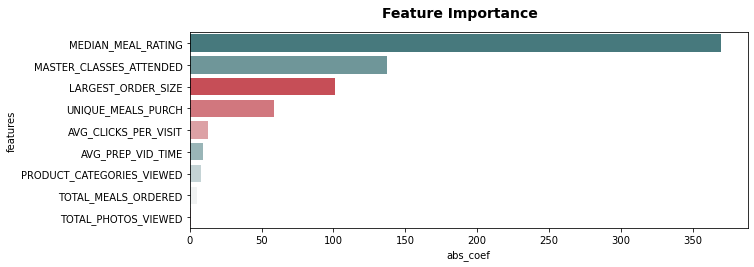

In [52]:
selected_features = Utils.stat_feature_selection_regression(
    data_df = original_df,
    dependent_variable = dependent_variable,
    features_dict = original_features
)

# Building the model
base_model = LinearRegression()
model_result = Utils.split_execute_model(
    x_col=selected_features,
    y_col=dependent_variable,
    data=original_df,
    model=base_model
)

# Showing Model Results
print(f"Train Score: {model_result['train_score']}")
print(f"Test Score: {model_result['test_score']}")
print(f"RSME: {model_result['rsme']}")

plot_feature_coefficients(selected_features, base_model.coef_)

The base model has a performance of 57.7%. After all the data manipulation, I should expect this score to increase.

Additionally, the **MEDIAN_MEAL_RATING** is the feature with the highest positive coefficient followed by **MASTER_CLASSES_ATTENDED**. On the other hand, **LARGEST_ORDER_SIZE**, **REFRIGERATED_LOCKER**, and **UNIQUE_MEALS_PURCH** have the highest negative coefficient.

## New Model w/ All Features
Now, I will create a *Linear Regression* model with the modified data, transformed variables, and new features. This iteration will use all the features to see what is their respective on the new test score, which is expected to increase due to the data manipulation. 

Train Score: 0.815
Test Score: 0.82
RSME: 0.205


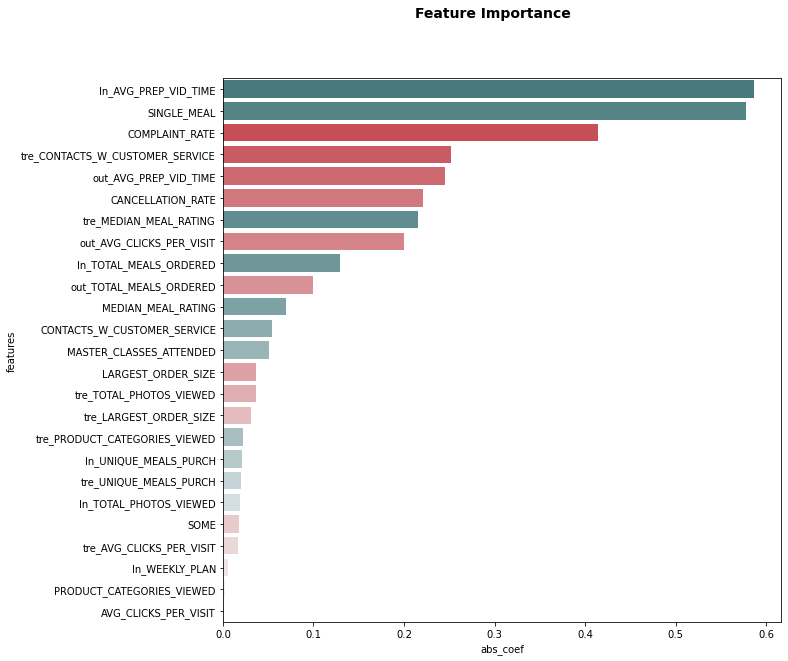

In [53]:
# Selecting features
selected_features = Utils.stat_feature_selection_regression(
    data_df = flagged_df,
    dependent_variable = transformed_dependent,
    features_dict = new_features
)

# Building model
new_model = LinearRegression()
model_result = Utils.split_execute_model(
    x_col=selected_features, 
    y_col=transformed_dependent,
    data=flagged_df,
    model=new_model
)

# Showing results
print(f"Train Score: {model_result['train_score']}")
print(f"Test Score: {model_result['test_score']}")
print(f"RSME: {model_result['rsme']}")

plot_feature_coefficients(selected_features, new_model.coef_)

With the new feature, the most important positive coefficient changes to be the **SINGLE_MEAL** feature followed by the transformed **ln_AVG_PREP_VID_TIME**.

## Looking for best Model
Since this class takes a model as a parameter, I will be extracting the regressors from the sklearn.linear_model API, KNeighborsRegressor and MLPRegressor. This will allow me to iterate over most of the scikit-learn regression models, evaluate it with the RFECV class, and determine which model achieves the highest test score with the lowest number of features. I will only consider those models where the difference between the train score and test score is not higher than 0.05 to allow overfitting and underfitting.

I will be showing the result of each iteration and, when finished, I will displaying the information of the model with the best score and the selected features.

Note: I will skip the execution of the model TheilSenRegressor because it takes to long to execute.

<!--
 |  RFECV resolution order:
 |      RFECV
 |      RFE
 |      sklearn.feature_selection._base.SelectorMixin
 |      sklearn.base.TransformerMixin
 |      sklearn.base.MetaEstimatorMixin
 |      sklearn.base.BaseEstimator
 |      builtins.object
-->

In [56]:
# Muting warnings
warnings.simplefilter('ignore')

X = flagged_df[selected_features]
y = flagged_df[transformed_dependent]

train_test_threshold = 0.05

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)

lst_class = sklearn.utils.all_estimators(type_filter='regressor')
            
max_score = {
    "score": 0,
    "model": "None",
    "num_features": 0,
    "features": []
}
for reg_class in lst_class:
    if reg_class[0] not in 'TheilSenRegressor':
        try:
            print(f"Starting w/ {reg_class[0]}", end=" ")

            success = False
            try_RFECV = True
            while not success:
                if try_RFECV:
                    model = fs.RFECV(estimator=reg_class[1]())
                else:
                    model = reg_class[1]()

                try:
                    model_result = Utils.execute_model(
                        x_train=X_train,
                        y_train=y_train,
                        x_test=X_test,
                        y_test=y_test,
                        model=model
                    )
                    success = True
                    if try_RFECV:
                        print("using Feature Selector Algorithm")
                    else:
                        print("training model with all the features")
                except Exception as ex:
                    if try_RFECV:
                        try_RFECV=False
                    else:
                        sucess=False
                        raise ex

            if try_RFECV:
                num_features = model.n_features_
                feat_list = X_train.columns[model.support_].tolist()
            else:
                num_features = len(selected_features)
                feat_list = selected_features

            diff_aux = np.abs(model_result["train_score"] - model_result["test_score"])
            score_aux = model_result["test_score"]

            if (diff_aux < train_test_threshold):
                if (score_aux > max_score["score"]) or (
                    (score_aux == max_score["score"]) and 
                    (max_score["num_features"] > num_features)
                ):
                    max_score["score"] = score_aux
                    max_score["model"] = reg_class[0]
                    max_score["num_features"] = num_features
                    max_score["features"] = feat_list

            print(f"Number of features: {num_features}")
            print(f"Train score (Reduced Features): {model_result['train_score']}")
            print(f"Test score (Reduced Features): {model_result['test_score']}")
            print("-"*70)

        except Exception as ex:
            print(f"(Error! {ex})")
            print("-"*70)

class_ = getattr(sklearn.linear_model, max_score["model"])
model = class_()
model_result = Utils.split_execute_model(
    x_col=max_score["features"],
    y_col=transformed_dependent,
    data=flagged_df,
    model=model
)

# Ordering by importance
max_score['features'] = list(np.array(max_score['features'])[np.abs(model.coef_).argsort()])

print("\n----- SUMMARY -----")
print(f"{max_score['model']} is the model with the best performance.")
print(f"Train score (Reduced Features): {model_result['train_score']}")
print(f"Test score (Reduced Features): {model_result['test_score']}")
print(f"RSME (Reduced Features): {model_result['rsme']}")
print(f"\nNumber of selected features: {max_score['num_features']}")
print("Selected features:")
print(*max_score['features'], sep='\n')

Starting w/ ARDRegression using Feature Selector Algorithm
Number of features: 20
Train score (Reduced Features): 0.814
Test score (Reduced Features): 0.819
----------------------------------------------------------------------
Starting w/ AdaBoostRegressor using Feature Selector Algorithm
Number of features: 20
Train score (Reduced Features): 0.756
Test score (Reduced Features): 0.739
----------------------------------------------------------------------
Starting w/ BaggingRegressor training model with all the features
Number of features: 25
Train score (Reduced Features): 0.968
Test score (Reduced Features): 0.794
----------------------------------------------------------------------
Starting w/ BayesianRidge using Feature Selector Algorithm
Number of features: 17
Train score (Reduced Features): 0.814
Test score (Reduced Features): 0.819
----------------------------------------------------------------------
Starting w/ CCA training model with all the features
Number of features: 25
T

Starting w/ PLSRegression training model with all the features
Number of features: 25
Train score (Reduced Features): 0.767
Test score (Reduced Features): 0.765
----------------------------------------------------------------------
Starting w/ PassiveAggressiveRegressor using Feature Selector Algorithm
Number of features: 19
Train score (Reduced Features): 0.768
Test score (Reduced Features): 0.742
----------------------------------------------------------------------
Starting w/ PoissonRegressor (Error! 'str' object has no attribute 'decode')
----------------------------------------------------------------------
Starting w/ RANSACRegressor training model with all the features
Number of features: 25
Train score (Reduced Features): 0.771
Test score (Reduced Features): 0.773
----------------------------------------------------------------------
Starting w/ RadiusNeighborsRegressor (Error! Input contains NaN, infinity or a value too large for dtype('float64').)
---------------------------

The result shows that the model with the best score and the least number of features is **LassoCV with only 14** features. Before building a definitive model, I will proceed with the Hyperparameter Tuning.

## Hyperparameter Tuning
During the feature selection process, all the model were created with their default parameter (called hyperparameters). Nonetheless, some models allows to enhance the predictions by selecting the best hyperparameters. To know what hyperparameters can be tunned in a model (if any), one must go to the models documentations

In [57]:
help(sklearn.linear_model.LassoCV)

Help on class LassoCV in module sklearn.linear_model._coordinate_descent:

class LassoCV(sklearn.base.RegressorMixin, LinearModelCV)
 |  LassoCV(*, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', max_iter=1000, tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=None, positive=False, random_state=None, selection='cyclic')
 |  
 |  Lasso linear model with iterative fitting along a regularization path.
 |  
 |  See glossary entry for :term:`cross-validation estimator`.
 |  
 |  The best model is selected by cross-validation.
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=1e-3
 |      Length of the path. ``eps=1e-3`` means that
 |      ``alpha_min / alpha_max = 1e-3``.
 |  
 |  n_alphas : int, default=100
 |      Number of alphas along the regularization p

From what has been described above, I will proceed to tune the *eps* hyperparameter. I will use scikit-learn's GridSearchCV to test a series of possible values for eps and use the one with the best performance. To visualize the performance of each eps value, I will plot the model's score achieved with each of them.

BEST MODEL SCORE SUMMARY
Train score: 0.812
Test score: 0.82
RSME: 0.205


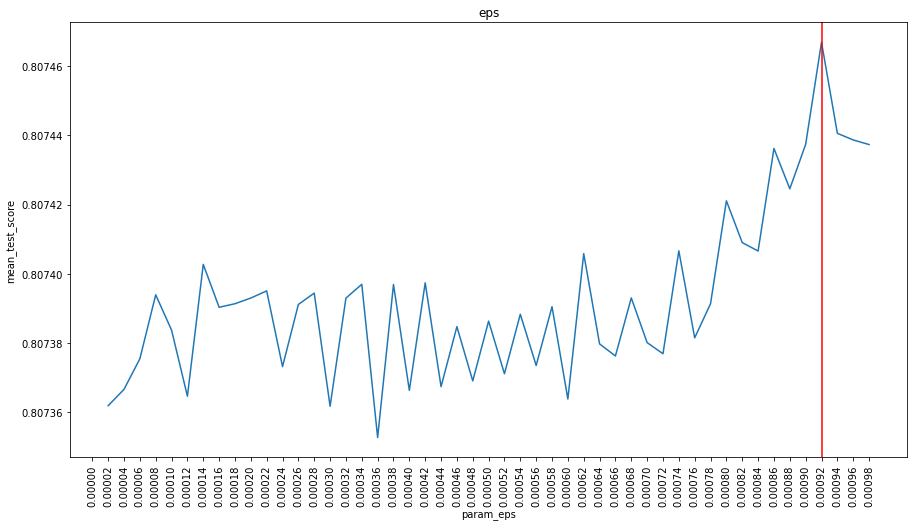

Best Value of eps: 0.00092


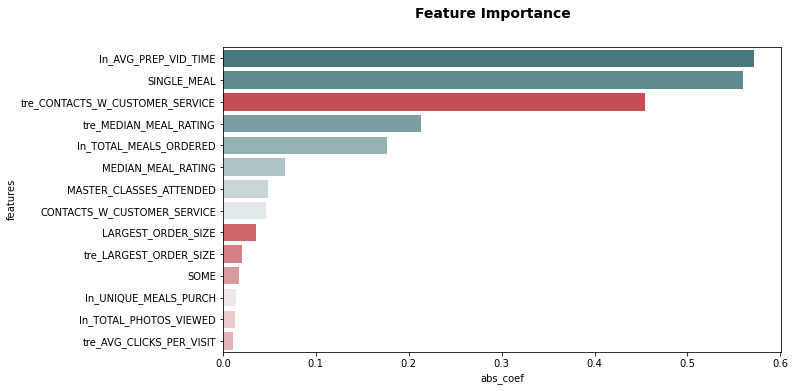

In [58]:
# declaring a hyperparameter space
hyper_params={
    "eps": list(np.arange(0, 1e-3, 2e-5))
}

model=sklearn.linear_model.LassoCV()

model_cv=GridSearchCV(
    estimator=model,
    param_grid=hyper_params
)

model_result=Utils.split_execute_model(
    x_col=max_score['features'],
    y_col=transformed_dependent,
    data=flagged_df,
    model=model_cv
)

print(f"BEST MODEL SCORE SUMMARY")
print(f"Train score: {model_result['train_score']}")
print(f"Test score: {model_result['test_score']}")
print(f"RSME: {model_result['rsme']}")

for param in hyper_params.keys():
    fig, axes = plt.subplots(figsize=(15,8))
    line_plt = sns.lineplot(
        x=f'param_{param}',
        y='mean_test_score',
        data=pd.DataFrame(model_cv.cv_results_),
        ax=axes
    )
    line_plt.set_title(param)
    plt.axvline(x=model_cv.best_params_[param], color='red')
    line_plt.set(xticks=hyper_params[param])
    plt.xticks(rotation=90)
    plt.show()
    
    print(f"Best Value of {param}: {model_cv.best_params_[param]}")


plot_feature_coefficients(max_score['features'], model_cv.best_estimator_.coef_)

The algorithm shows that the best performance is achieved when the **value of eps is 0.00092**. As seen in the plot, the performance increases until this point and then starts to decline. This gives me a signal that there is no point on trying running the model with higher values.

***
# Model Building
After finally determining the important features, the best model, and its best hyperparameter, I will build a model from scratch. This is the part of the code that will be located in a Python script to create the model.

In [59]:
# Loading data
data_df = pd.read_excel("data/Apprentice_Chef_Dataset.xlsx")

# Removing inconsistencies
data_df = data_df[data_df['LARGEST_ORDER_SIZE'] > 0]

# Transforming destination
data_df['ln_REVENUE'] = np.log(data_df['REVENUE'])
transformed_dependent = 'ln_REVENUE'


# Treating
data_df['ln_TOTAL_PHOTOS_VIEWED'] = data_df['TOTAL_PHOTOS_VIEWED']
data_df.loc[data_df['TOTAL_PHOTOS_VIEWED'] != 0, 'ln_TOTAL_PHOTOS_VIEWED'] = data_df['TOTAL_PHOTOS_VIEWED'].apply(np.log)

data_df['ln_UNIQUE_MEALS_PURCH'] = data_df['UNIQUE_MEALS_PURCH']
data_df.loc[data_df['UNIQUE_MEALS_PURCH'] != 0, 'ln_UNIQUE_MEALS_PURCH'] = data_df['UNIQUE_MEALS_PURCH'].apply(np.log)

data_df['ln_AVG_PREP_VID_TIME'] = data_df['AVG_PREP_VID_TIME']
data_df.loc[data_df['AVG_PREP_VID_TIME'] != 0, 'ln_AVG_PREP_VID_TIME'] = data_df['AVG_PREP_VID_TIME'].apply(np.log)

data_df['ln_TOTAL_MEALS_ORDERED'] = data_df['TOTAL_MEALS_ORDERED']
data_df.loc[data_df['TOTAL_MEALS_ORDERED'] != 0, 'ln_TOTAL_MEALS_ORDERED'] = data_df['TOTAL_MEALS_ORDERED'].apply(np.log)


# Flagging trends
data_df['tre_AVG_CLICKS_PER_VISIT'] = 0        
data_df.loc[data_df['AVG_CLICKS_PER_VISIT'] > 11, 'tre_AVG_CLICKS_PER_VISIT'] = 1

data_df['tre_LARGEST_ORDER_SIZE'] = 0
data_df.loc[data_df['LARGEST_ORDER_SIZE'] > 8, 'tre_LARGEST_ORDER_SIZE'] = 1

data_df['tre_MEDIAN_MEAL_RATING'] = 0
data_df.loc[data_df['MEDIAN_MEAL_RATING'] > 3, 'tre_MEDIAN_MEAL_RATING'] = 1

data_df['tre_CONTACTS_W_CUSTOMER_SERVICE'] = 0
data_df.loc[data_df['CONTACTS_W_CUSTOMER_SERVICE'] > 10, 'tre_CONTACTS_W_CUSTOMER_SERVICE'] = 1

# New features
data_df['SOME'] = 0
data_df.loc[
    (data_df['WEEKLY_PLAN'] > 0) & (data_df['WEEKLY_PLAN'] < 15), 
    'SOME'
] = 1

data_df['SINGLE_MEAL'] = 0
data_df.loc[data_df['UNIQUE_MEALS_PURCH'] == 1, 'SINGLE_MEAL'] = 1


features=[
    'tre_AVG_CLICKS_PER_VISIT',
    'ln_TOTAL_PHOTOS_VIEWED',
    'ln_UNIQUE_MEALS_PURCH',
    'SOME',
    'tre_LARGEST_ORDER_SIZE',
    'LARGEST_ORDER_SIZE',
    'CONTACTS_W_CUSTOMER_SERVICE',
    'MASTER_CLASSES_ATTENDED',
    'MEDIAN_MEAL_RATING',
    'ln_TOTAL_MEALS_ORDERED',
    'tre_MEDIAN_MEAL_RATING',
    'tre_CONTACTS_W_CUSTOMER_SERVICE',
    'SINGLE_MEAL',
    'ln_AVG_PREP_VID_TIME'
]


# Model creation
final_model=sklearn.linear_model.LassoCV(eps=0.00092)

model_result = Utils.split_execute_model(
    x_col=features,
    y_col=transformed_dependent,
    data=data_df,
    model=final_model
)

# Showing results
print(f"Train Score: {model_result['train_score']}")
print(f"Test Score: {model_result['test_score']}")
print(f"RSME: {model_result['rsme']}")

Train Score: 0.812
Test Score: 0.821
RSME: 0.205


***
# Conclusions

## Insights
- The people that, on average, spend more time watching prep video time, tend to bring more revenue. Assuming that a longer video means a more difficult dish to cook, I will say that the customers that are bringing more revenue are looking for a greater sense of accomplishment. The better the business can give this to its customers, the more engaged the customers will be with the business and its offering. 
- The greater the quantity of contacts with customer service, the lower the revenue. This confirms that most of the contacts are due to complaints, and these complaints are strong enough to reduce or stop using Apprentice Chef's services. Two actions need to be done here: (1) Improve the customer service and create compensations programs that can help reduce churns. (2) Gather information from customer center to understand the company's pain point and make improvements.

## Main Takeaways
- The logarithmic transformation applied to the dependent variable helps a more accurate prediction.
- There might be more than one machine learning regression model that can return the same score. However, it is better to find which will give the same result using the least number of features.

***
***

# References

Brownlee, J (2019, November 27th). [How to Choose a Feature Selection Method for Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/). Machine Learning Mastery.

ImportanceOfBeingErnest (2017, March 20th). [Pointplot Not Showing Line When Palette is Set](https://stackoverflow.com/questions/42902226/pointplot-not-showing-line-when-palette-is-set). StackOverflow
